# Multi-class Classification with Tensorflow : Identifying Dart Players


### Exploratory Data Analysis


We will build classification model in Keras with the dart player dataset.

Our goal is to distinguish from the dart throwing result which shot belongs to which player. The dataset comes with 2 features: X co-ordinates and Y co-ordinates. These features represent the position of the thrown darts on dart boards by different players. The labels are found in the dataframe's competitor column.

In [1]:
import pandas as pd
darts = pd.read_csv("darts.csv")
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


We will explore some visualizations on our dataset. Although deep learning models are very strong and can easily identify complex patterns, exploring the dataset can give us some insight on how we can approach the end-to-end solution

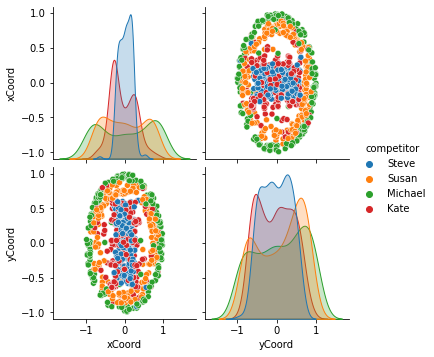

In [2]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Use pairplot and set the hue to be our class column
sns.pairplot(darts, hue='competitor') 

# Show the plot
plt.show()



In [3]:
# Describe the data
print('Dataset stats: \n', darts.describe())

# Count the number of observations per class
print('Observations per class: \n', darts['competitor'].value_counts())

Dataset stats: 
            xCoord      yCoord
count  800.000000  800.000000
mean     0.005943    0.022868
std      0.475971    0.514482
min     -0.991140   -0.993547
25%     -0.295314   -0.423079
50%      0.000619    0.034483
75%      0.273953    0.452204
max      0.984816    0.994344
Observations per class: 
 Steve      200
Susan      200
Michael    200
Kate       200
Name: competitor, dtype: int64


### Building a simple model


We see that ompetitors are not yet in a format to be understood by the model. They contain the names of the competitors as strings. We will first turn these competitors into unique numbers,then use the `to_categorical()` function from `keras.utils` to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

In [4]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


Now that we have successfully converted categorical features from string format to integer format, we will now do one-hot encoding the the categorical target variable

In [5]:

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


We're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Create a new model for later usage
new_model = tf.keras.Sequential(model.layers)
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


We will now parition the dataset into training and testing set. The dataset will be partitioned into features: `X_train` & `X_test`, and labels: `y_train` & `y_test`. We will train the model with `X_train` and `y_train`. Later we will evaluate the performance of the model with `X_test` and `y_test`

In [8]:
from sklearn.model_selection import train_test_split

X = darts.drop("competitor", axis=1)
y = competitors
X_train, X_test, y_train, y_test = train_test_split( X,y , random_state=104,test_size=0.25, shuffle=True)
coord_train, coord_test, competitors_train, competitors_test = X_train, X_test, y_train, y_test

Our model is now ready, just as our dataset. It's time to train!

The coordinates features and competitors labels you just transformed have been partitioned into coord_train,coord_test and competitors_train,competitors_test.

Let's find out who threw which dart just by looking at the board!

In [9]:
# Fit your model to the training data for 200 epochs
h_callback = model.fit(coord_train,competitors_train,epochs=200, validation_split = 0.2)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
15/15 [==============================] - 0s 12ms/step - loss: 1.3808 - accuracy: 0.2896 - val_loss: 1.3768 - val_accuracy: 0.2833
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.3490 - accuracy: 0.3625 - val_loss: 1.3445 - val_accuracy: 0.3000
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 1.3112 - accuracy: 0.3979 - val_loss: 1.3012 - val_accuracy: 0.3750
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.2619 - accuracy: 0.4083 - val_loss: 1.2488 - val_accuracy: 0.4167
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.4208 - val_loss: 1.1923 - val_accuracy: 0.4083
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1252 - accuracy: 0.4417 - val_loss: 1.1173 - val_accuracy: 0.4750
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0490 - accuracy: 0.4938 - val_loss: 1.0406 - val_accuracy: 0.4667
Epoch 8/200


Let us now see some prediction data against raw labels to see how the prediction was interpreted for each sample and for each class. Since we have used softmax on the last layer, the prediction should be a distribution of probabilities among all class. The class will the most probabilistic value will be considered as the predicted class.

In [10]:
import numpy as np
coords_small_test = coord_test
competitors_small_test = competitors_test
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))


Raw Model Predictions                         | True labels
[0.00709205 0.7722302  0.030069   0.19060878] | [0. 1. 0. 0.]
[1.0197738e-03 3.8038790e-03 2.5911148e-05 9.9515045e-01] | [0. 0. 0. 1.]
[0.03231958 0.01646516 0.00629087 0.9449244 ] | [0. 0. 0. 1.]
[6.0702421e-02 6.7052298e-04 9.2464215e-01 1.3984913e-02] | [0. 0. 1. 0.]
[4.7900658e-03 7.8378969e-01 5.1889534e-04 2.1090131e-01] | [0. 0. 0. 1.]
[9.2699334e-02 7.6537335e-01 5.0241244e-04 1.4142488e-01] | [0. 1. 0. 0.]
[0.8875553  0.00846639 0.09615929 0.00781906] | [1. 0. 0. 0.]
[0.18841921 0.00195468 0.7856896  0.02393655] | [1. 0. 0. 0.]
[3.2403409e-02 9.5025802e-01 1.0934304e-04 1.7229257e-02] | [0. 1. 0. 0.]
[0.91567045 0.00157038 0.08040947 0.00234968] | [1. 0. 0. 0.]
[0.01015192 0.32488626 0.03345314 0.63150865] | [0. 1. 0. 0.]
[2.3977183e-02 9.6379292e-01 7.4925949e-05 1.2154997e-02] | [0. 1. 0. 0.]
[0.16297604 0.00347069 0.7954359  0.03811733] | [0. 0. 1. 0.]
[0.2332049  0.00351704 0.70084345 0.06243463] | [1. 0. 0. 0.]


Let us round up the values and take the index of the largest probabilistic value as the predicted class. Also, let us compare that with the true labels

In [11]:

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

Rounded Model Predictions | True labels
                        1 | [0. 1. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        2 | [0. 0. 1. 0.]
                        1 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]
                        0 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        1 | [0. 1. 0. 0.]
                        0 | [1. 0. 0. 0.]
                        3 | [0. 1. 0. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        3 | [1. 0. 0. 0.]
                        3 | [0. 1. 0. 0.]
                        1 | [0. 1. 0. 0.]
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0

### Visualizing Model Performance


We can visualize the performance of the model through plotting the training loss and accuracy against validation loss and accuracy which is available in history callbacks. History callback is returned by default every time we train a model with the `.fit()` method. To access these metrics we can access the history dictionary parameter inside the returned `h_callback` object with the corresponding keys.



In [12]:
print(h_callback.params)
print(h_callback.history.keys())

{'verbose': 1, 'epochs': 200, 'steps': 15}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


We will create two helper functions for this task and plot the results stored in history with `plot_accuracy()` and `plot_loss()`, two simple matplotlib functions. The task of `plot_accuracy()` is to plot training loss against validation loss. On the other hand, the task of `plot_loss()` is to plot training accuracy against validation accuracy.


In [13]:
def plot_loss(loss,val_loss):
  # Plot training & validation loss values
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Now let us use these helper functions along with history callback object to produce the desired graph

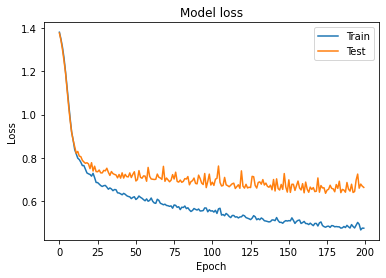

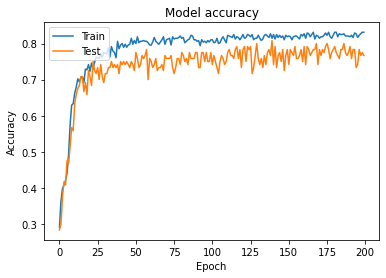

In [14]:

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

### Saving the model with combination of callbacks

We can see that sometimes the model is over-trained that leads to overfitting. We will use the `EarlyStopping()` callback which is useful since it allows us to stop the model training if it no longer improves after a given number of epochs. 

Also, Deep learning models can take a long time to train, especially when we move to deeper architectures and bigger datasets. Saving the model every time it improves as well as stopping it when it no longer does allows us to worry less about choosing the number of epochs to train for. We can also restore a saved model anytime and resume training where we left it. We can use `ModelCheckpoint()` for that.

To make use of these, we need to pass the callbacks inside a list to the model's callback parameter in the `fit()`method.

In [15]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model 
model_checkpoint = ModelCheckpoint('best_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = new_model.fit(X_train, y_train,
                    epochs = 10000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    # validation_data = (X_test, y_test),
                    validation_split = 0.2)

Epoch 1/10000
15/15 [==============================] - 1s 36ms/step - loss: 0.4932 - accuracy: 0.8167 - val_loss: 0.8180 - val_accuracy: 0.7167
Epoch 2/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.8104 - val_loss: 0.6338 - val_accuracy: 0.7833
Epoch 3/10000
15/15 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8229 - val_loss: 0.6771 - val_accuracy: 0.7667
Epoch 4/10000
15/15 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8250 - val_loss: 0.6560 - val_accuracy: 0.7750
Epoch 5/10000
15/15 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.8229 - val_loss: 0.6640 - val_accuracy: 0.7667


Let us again visualize the model performance through `plot_accuracy()` and `plot_loss()` helper functions

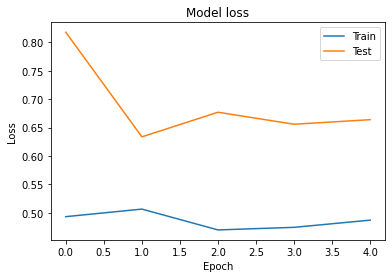

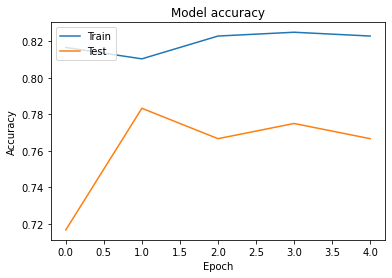

In [16]:

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

In [17]:

# Evaluate your model accuracy on the test data
accuracy = new_model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

7/7 [==============================] - 0s 712us/step - loss: 0.6575 - accuracy: 0.7800
Accuracy: 0.7799999713897705
